# The Grammar of Graphics

In [59]:
import pandas as pd
import numpy as np

In [60]:
areas = ['north', 'east', 'west', 'south', 'central']
sales = [5, 25, 15, 20, 10]
profit = [2,8,6,5,3]

In [61]:
df = pd.DataFrame({"areas": areas, "sales": sales, "profit": profit})

# Plotting - Matplotlib

In [62]:
# ! conda install -c conda-forge plotnine
# ! conda install -c conda-forge seaborn

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
plt.(x = df.areas, y = df.sales)
plt.show()

SyntaxError: invalid syntax (<ipython-input-64-6441ab9248de>, line 1)

# Plotting - Pandas

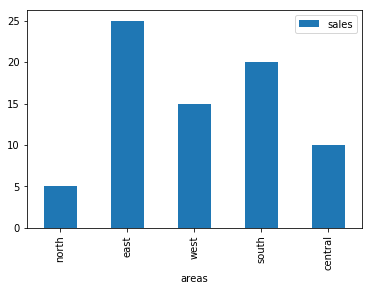

In [65]:
df.plot(x="areas", y = "sales", kind="bar")

In [66]:
categories = np.unique(df['areas'])
categories

array(['central', 'east', 'north', 'south', 'west'], dtype=object)

In [67]:
colors = np.linspace(0, 1, len(categories))
colors

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])

In [68]:
colordict = dict(zip(categories, colors))  
df["color"] = df['areas'].apply(lambda x: colordict[x])

In [82]:
color_list = ['r', 'b']

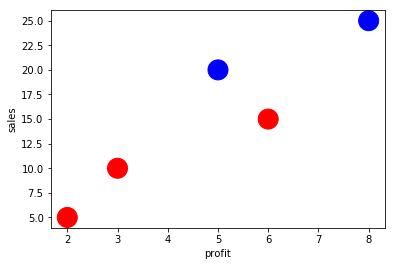

In [83]:
df.plot(x="profit", y ="sales", c=color_list, kind="scatter", s = 400)

# Plotnine

In [85]:
from plotnine import *

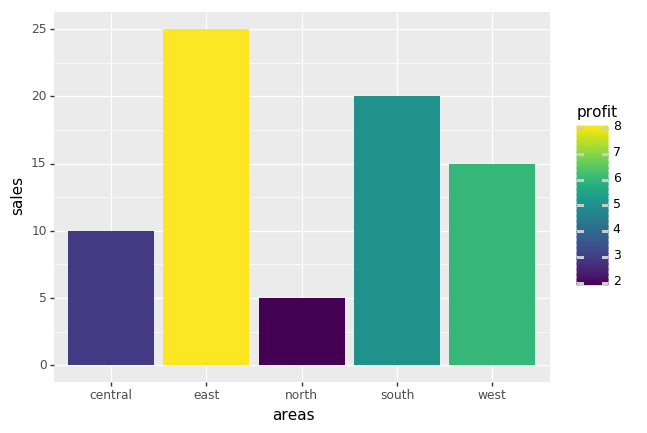

<ggplot: (-9223372036560287614)>

In [88]:
ggplot(df) + aes(x = 'areas', y = 'sales', fill = 'profit') + geom_col()

In [89]:
plot = ggplot(df)

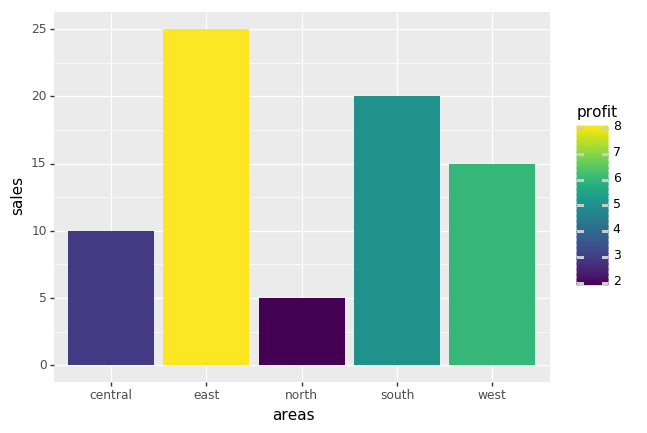

<ggplot: (294841520)>

In [90]:
plot + aes(x = 'areas', y = 'sales', fill = 'profit') + geom_col()

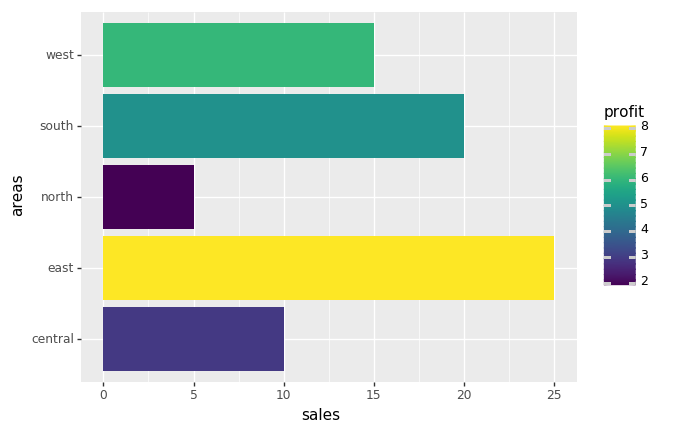

<ggplot: (294854215)>

In [91]:
plot + aes(x = 'areas', y = 'sales', fill = 'profit') + geom_col() + coord_flip()

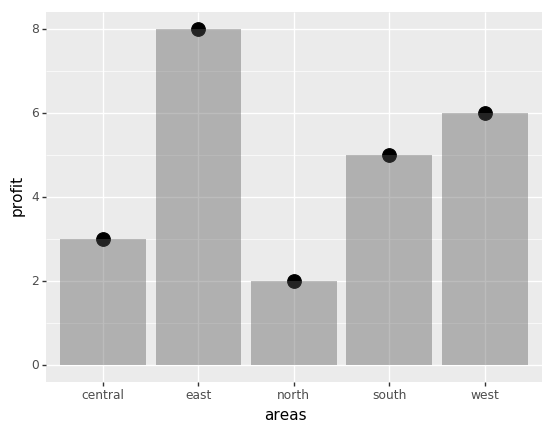

<ggplot: (-9223372036559026421)>

In [106]:
( ggplot(df) + 
     geom_point(aes(x = "areas", y = "profit"), size = 5) +
     geom_col(aes(x = "areas", y="profit"), alpha = 0.4)
)

In [107]:
from plotnine.data import diamonds

In [108]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#  1 Dimensional - Continuous

In [109]:
diamonds.price.describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [123]:
diamonds_small = diamonds.head(200)

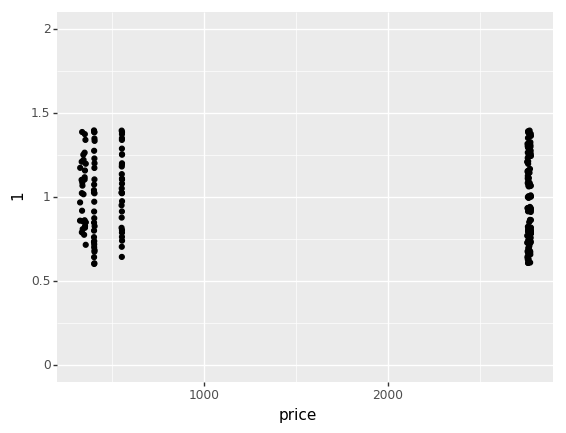

<ggplot: (303977725)>

In [125]:
ggplot(diamonds_small) + aes(x = 'price', y = 1) + geom_jitter() + ylim(0,2)

/Users/amitkaps/miniconda3/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:90: UserWarning: 'stat_bin()' using 'bins = 45'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


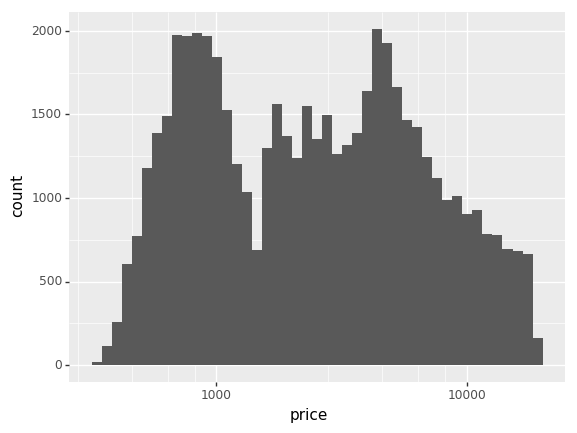

<ggplot: (-9223372036557406506)>

In [172]:
ggplot(diamonds) + aes(x = 'price') + geom_histogram() + scale_x_log10()

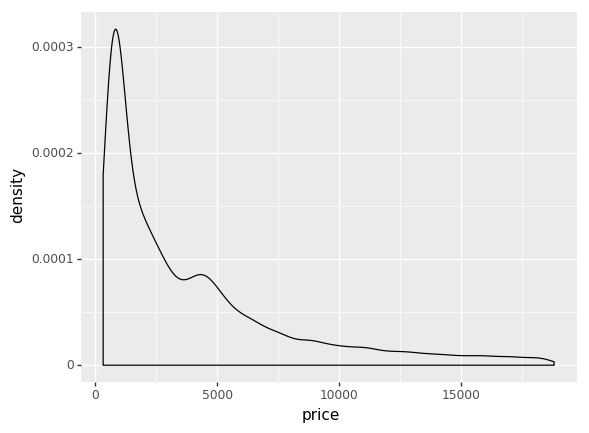

<ggplot: (295149011)>

In [129]:
ggplot(diamonds) + aes(x = 'price') + geom_density()

# 1D - Categorical

In [131]:
diamonds.cut.unique()

[Ideal, Premium, Good, Very Good, Fair]
Categories (5, object): [Fair < Good < Very Good < Premium < Ideal]

In [132]:
diamonds.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

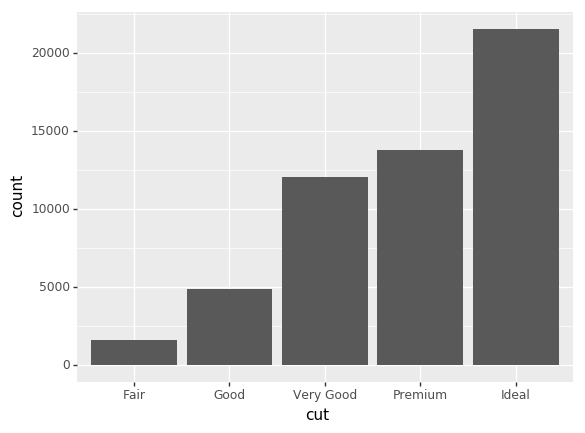

<ggplot: (296623950)>

In [144]:
ggplot(diamonds) + aes(x = 'cut') + geom_bar()

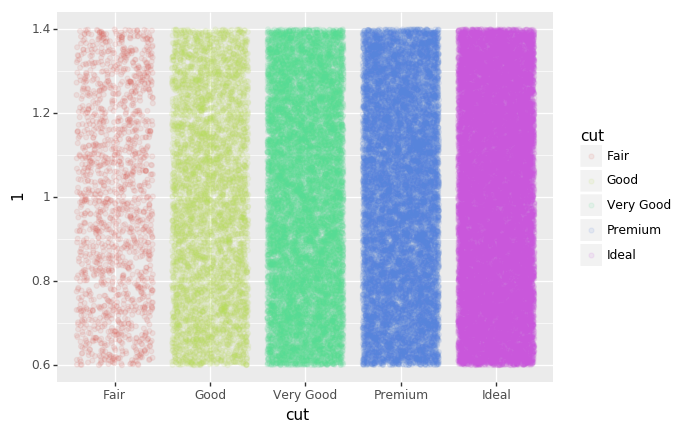

<ggplot: (300911813)>

In [147]:
ggplot(diamonds) + aes(x = 'cut', y = 1, color = 'cut') + geom_jitter(alpha = 0.1)

## 2 Dimensions - Continuous + Categorical

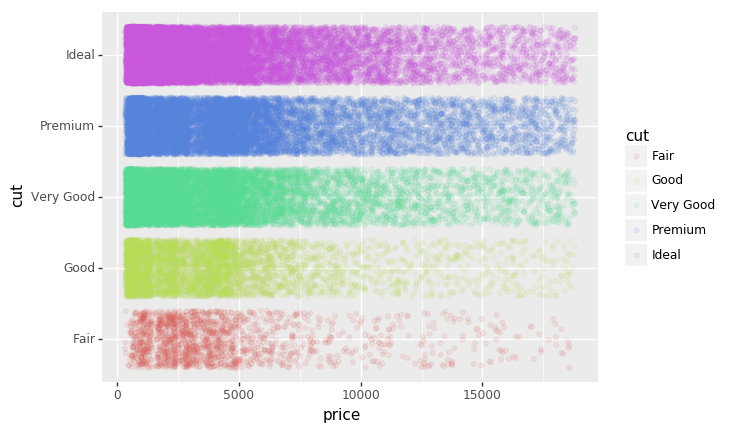

<ggplot: (307535585)>

In [151]:
ggplot(diamonds) + aes(x = "price", y = 'cut', color='cut') + geom_jitter(alpha = 0.1)

/Users/amitkaps/miniconda3/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:90: UserWarning: 'stat_bin()' using 'bins = 80'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


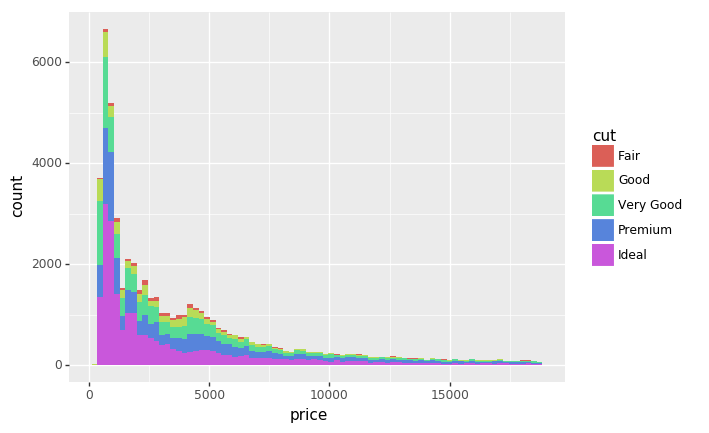

<ggplot: (311828821)>

In [153]:
ggplot(diamonds) + aes(x = "price", fill ="cut") + geom_histogram()

/Users/amitkaps/miniconda3/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:90: UserWarning: 'stat_bin()' using 'bins = 80'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


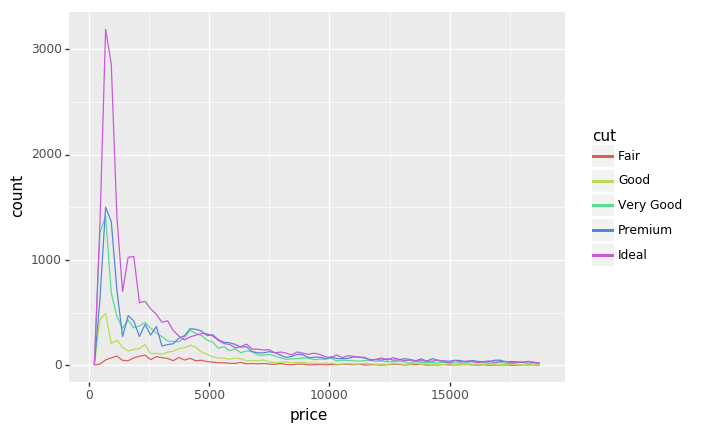

<ggplot: (-9223372036541585141)>

In [155]:
ggplot(diamonds) + aes(x = "price", color ="cut") + geom_freqpoly()

/Users/amitkaps/miniconda3/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:90: UserWarning: 'stat_bin()' using 'bins = 80'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


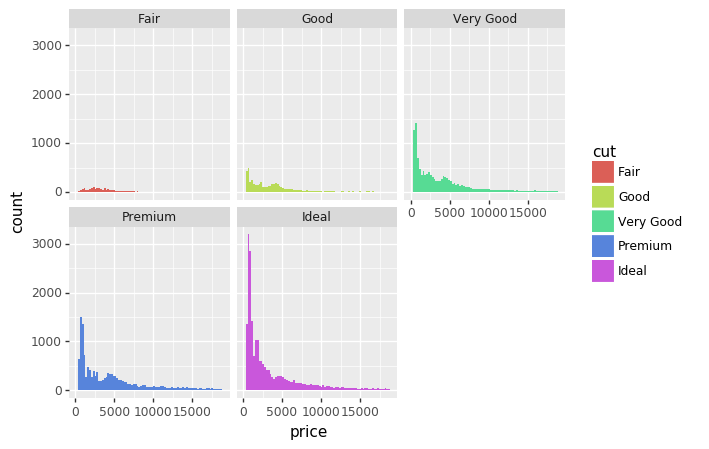

<ggplot: (295644571)>

In [157]:
ggplot(diamonds) + aes(x = "price", fill ="cut") + geom_histogram() + facet_wrap('cut')

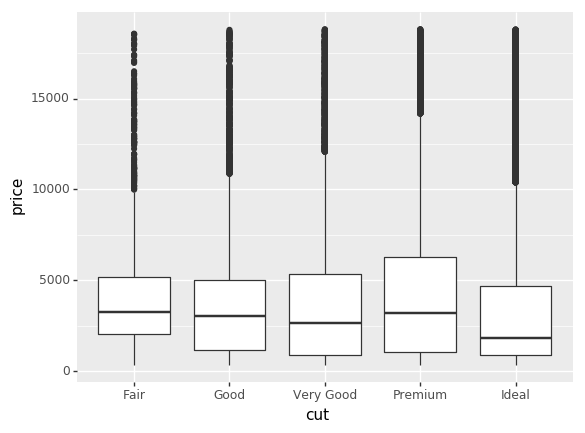

<ggplot: (296715619)>

In [161]:
ggplot(diamonds) + aes(y = "price", x ="cut") + geom_boxplot()

In [164]:
diamonds[diamonds.cut == 'Fair'].price.describe()

count     1610.000000
mean      4358.757764
std       3560.386612
min        337.000000
25%       2050.250000
50%       3282.000000
75%       5205.500000
max      18574.000000
Name: price, dtype: float64

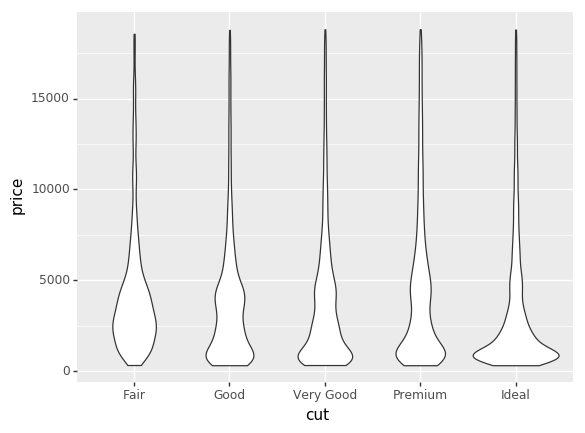

<ggplot: (-9223372036542708641)>

In [165]:
ggplot(diamonds) + aes(y = "price", x ="cut") + geom_violin()

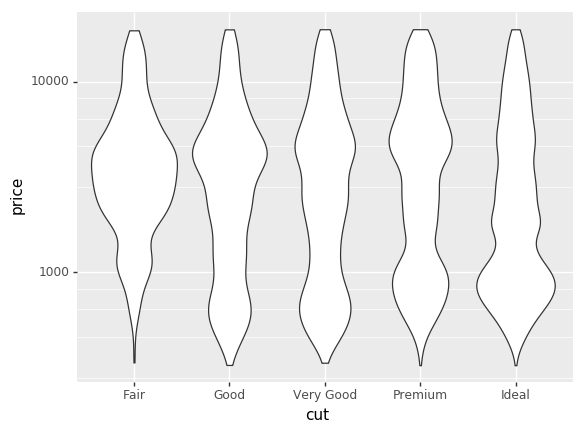

<ggplot: (-9223372036541583493)>

In [166]:
ggplot(diamonds) + aes(y = "price", x ="cut") + geom_violin() + scale_y_log10()

##  2D - Continuous with Continuous

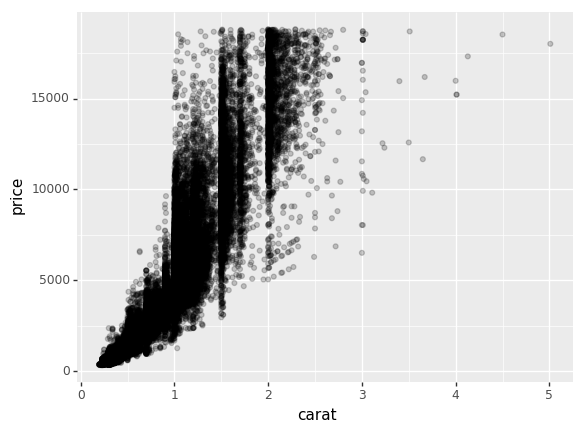

<ggplot: (-9223372036559327572)>

In [168]:
ggplot(diamonds) + aes('carat', 'price') + geom_point(alpha = 0.2)

In [ ]:
ggplot

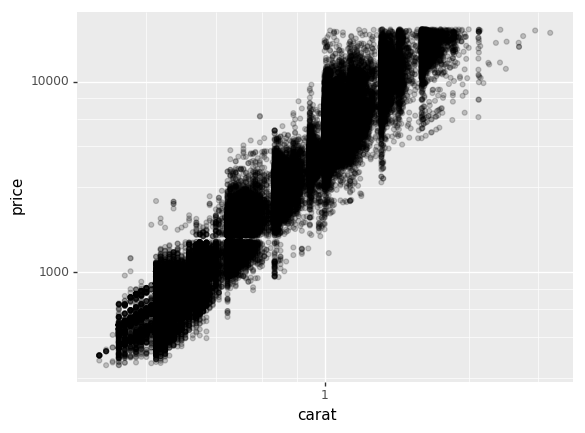

<ggplot: (-9223372036541684024)>

In [170]:
ggplot(diamonds) + aes('carat', 'price') + geom_point(alpha = 0.2) + scale_y_log10() + scale_x_log10()

## 2D - Categorical + Categorical

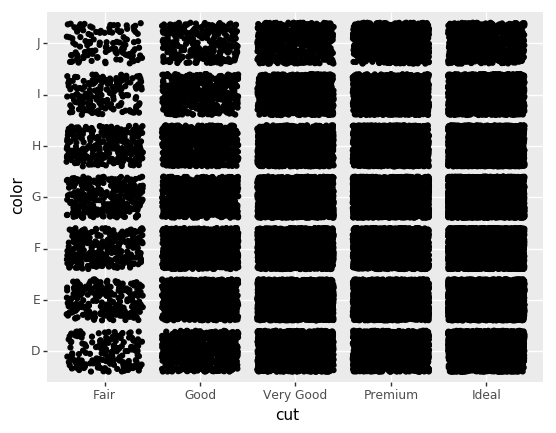

<ggplot: (297364495)>

In [174]:
ggplot(diamonds) + aes('cut', 'color') + geom_jitter()

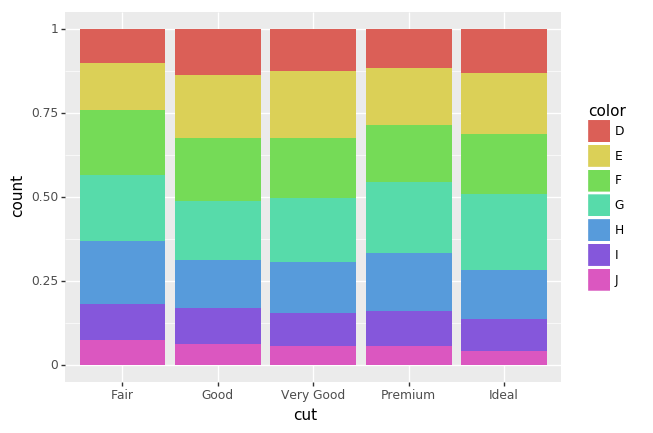

<ggplot: (298212458)>

In [177]:
ggplot(diamonds) + aes('cut', fill='color') + geom_bar(position = "fill")

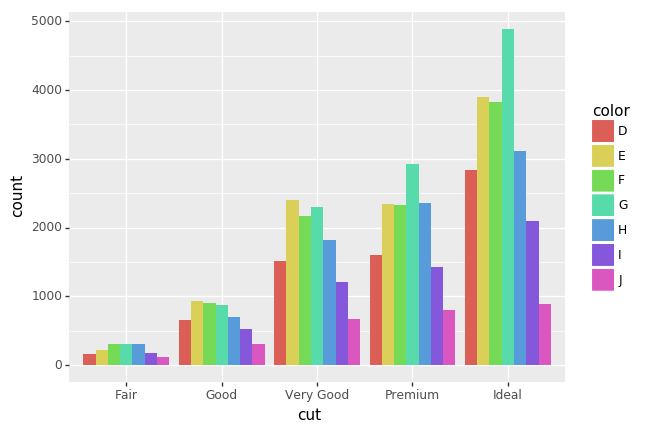

<ggplot: (-9223372036551538316)>

In [178]:
ggplot(diamonds) + aes('cut', fill='color') + geom_bar(position = "dodge")

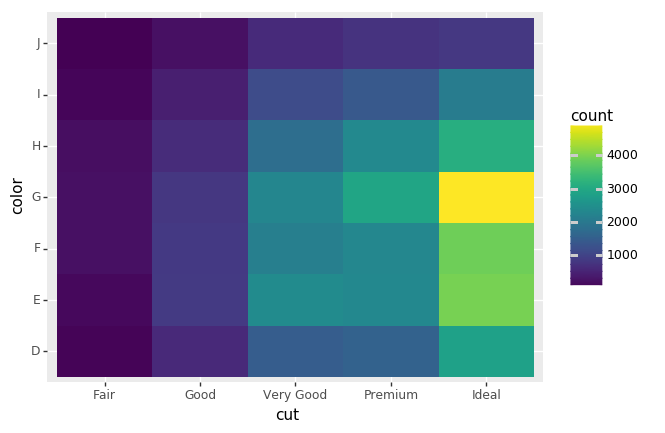

<ggplot: (306318372)>

In [186]:
ggplot(diamonds) + aes('cut', 'color') + geom_bin2d()

# 3 - 6 Dimensions

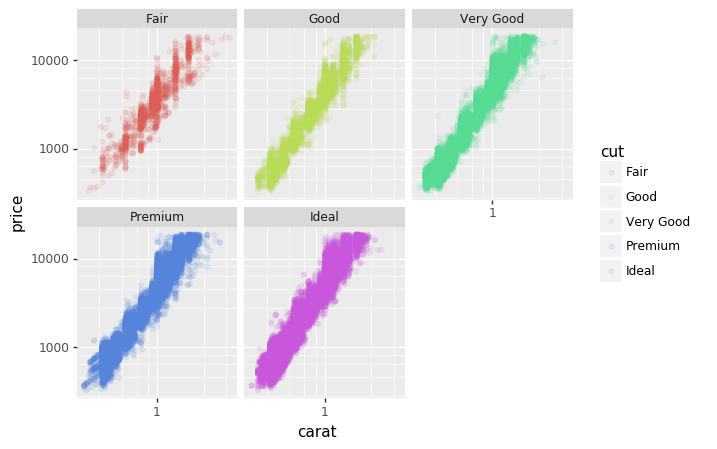

<ggplot: (308255566)>

In [191]:
(ggplot(diamonds) + 
    aes(x = "carat", y="price", color ="cut") + 
    geom_point(alpha = 0.1) + 
    scale_x_log10() +
    scale_y_log10() + 
    facet_wrap('cut')
)

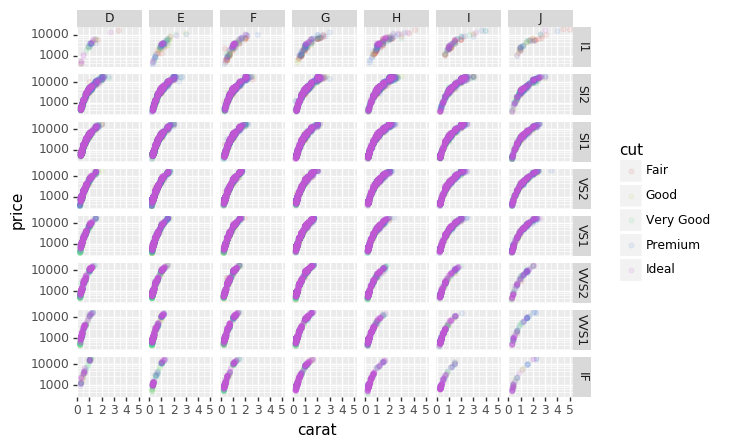

<ggplot: (-9223372036553563893)>

In [195]:
(ggplot(diamonds) + 
    aes(x = "carat", y="price", color ="cut") + 
    geom_point(alpha = 0.1) + 
    scale_y_log10() + 
    facet_grid(('clarity', 'color'))
)

In [196]:
diamonds.to_csv('diamonds.csv', index=False)